# Import Library

In [54]:
!pip install tpot
!pip install sklearn
!pip install seaborn

In [55]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

# Import Data

In [56]:
data = pd.read_csv(r'C:\Users\ASUS\Desktop\Jurnal\Automated-Machine-Learning/weatherAUS.csv')
data = data[0:1000]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Eksplorasi Data

In [57]:
# Ukuran DataFrame
print('Banyak Data: ', data.shape[0])
print('Banyak Fitur: ', data.shape[1]-1)

Banyak Data:  145460
Banyak Fitur:  22


# Persiapan Data

In [58]:
#melihat fitur yang memiliki nilai null
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [59]:
#menghapus data yang tidak memiliki label
data = data[~data['RainTomorrow'].isnull()]

## Missing Value Handling

In [60]:
catFeature = ['Location',
              'WindGustDir',
              'WindDir9am',
              'WindDir3pm',
              'RainToday']
for i in catFeature:
  mode = data[i].mode()
  data[i].fillna(mode[0], inplace = True)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [61]:
numFeature = ['MinTemp',
              'MaxTemp',
              'Rainfall',
              'Evaporation',
              'Sunshine',
              'WindGustSpeed',
              'WindSpeed9am',
              'WindSpeed3pm',
              'Humidity9am',
              'Humidity3pm',
              'Pressure9am',
              'Pressure3pm',
              'Cloud9am',
              'Cloud3pm',
              'Temp9am',
              'Temp3pm']
for i in numFeature:
  mean = data[i].mean()
  data[i].fillna(mean, inplace = True)

## Transformasi Fitur Kategorikal

In [62]:
for i in catFeature:
  data[i] = LabelEncoder().fit_transform(data[i])
data['RainTomorrow'] = LabelEncoder().fit_transform(data['RainTomorrow'])

<ipython-input-62-b0a4acbbfcbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = LabelEncoder().fit_transform(data[i])
<ipython-input-62-b0a4acbbfcbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RainTomorrow'] = LabelEncoder().fit_transform(data['RainTomorrow'])


## Feature Selection

<AxesSubplot:>

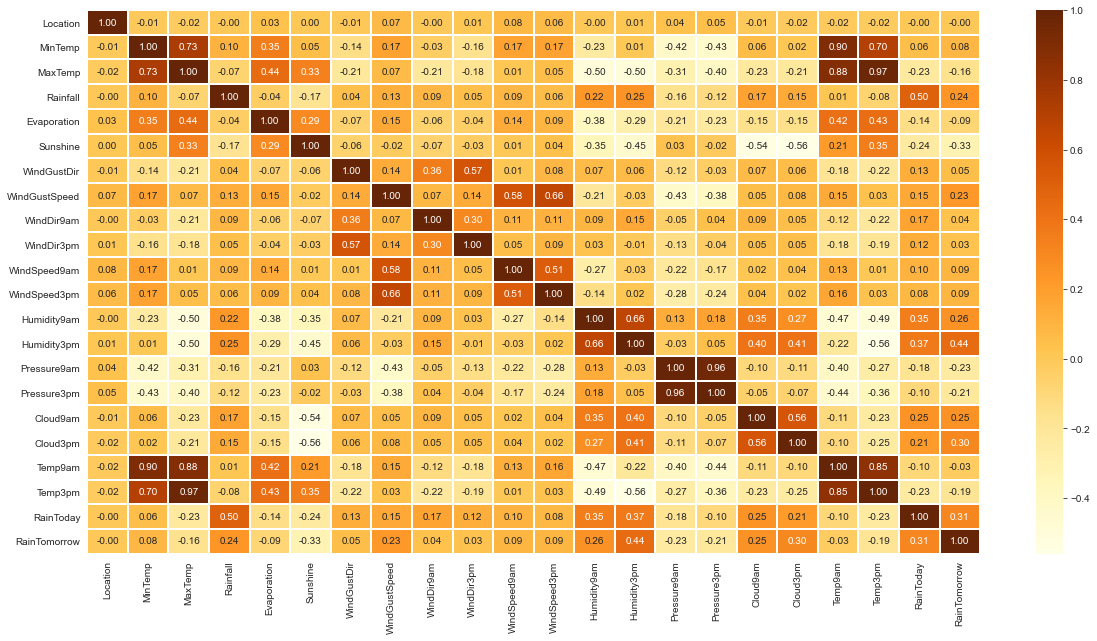

In [63]:
sns.set({'figure.figsize':(20,10)})
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths= 2, cmap="YlOrBr")

In [64]:
#data.drop(['Location', 'MinTemp','Evaporation','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Temp9am'], axis='columns', inplace=True)
data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Temp9am'], axis='columns', inplace=True)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Data Split

In [65]:
label = data['RainTomorrow']
feature = data.drop('RainTomorrow', axis=1)
featureTrain, featureTest,labelTrain,labelTest = train_test_split(feature,label, test_size = 0.2,random_state = 12)

## Scaling

In [66]:
featureTrain = featureTrain.drop('Date',axis=1)
featureTest = featureTest.drop('Date',axis=1)
#featureTrain = StandardScaler().fit_transform(featureTrain)
#featureTest = StandardScaler().fit_transform(featureTest)
featureTrain = MinMaxScaler().fit_transform(featureTrain)
featureTest = MinMaxScaler().fit_transform(featureTest)

## Dimensionality Reduction

In [67]:
#pca = PCA(n_components=6)
#components = pca.fit_transform(featureTrain)
#featureTrain = pd.DataFrame(data=components)
#pca = PCA(n_components=6)
#components = pca.fit_transform(featureTest)
#featureTest = pd.DataFrame(data=components)

# Pemodelan Data

In [68]:
tpot = TPOTClassifier(verbosity=2, generations=3)
tpot.fit(featureTrain, labelTrain)

Optimization Progress:   0%|          | 0/400 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8541501667599686

Generation 2 - Current best internal CV score: 0.8541501667599686


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=7, max_features=0.5, min_samples_leaf=16, min_samples_split=13, n_estimators=100, subsample=0.7000000000000001)


TPOTClassifier(generations=3, verbosity=2)

In [69]:
tpot.fitted_pipeline_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=7, max_features=0.5,
                                            min_samples_leaf=16,
                                            min_samples_split=13,
                                            subsample=0.7000000000000001))])

In [70]:
tpot.score(featureTest, labelTest)

0.8484123914342979

In [71]:
labelPredTpot = tpot.predict(featureTest)

In [72]:
print(confusion_matrix(labelTest, labelPredTpot), '\n')
print(classification_report(labelTest, labelPredTpot))

[[20541  1518]
 [ 2793  3587]] 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22059
           1       0.70      0.56      0.62      6380

    accuracy                           0.85     28439
   macro avg       0.79      0.75      0.76     28439
weighted avg       0.84      0.85      0.84     28439

